Chapter 16 of [A Guided Tour of Mathematical Methods for the Physical Sciences](https://www.cambridge.org/nz/academic/subjects/physics/mathematical-methods/guided-tour-mathematical-methods-physical-sciences-3rd-edition?format=PB&isbn=9781107641600) deals with integration in the complex plane. A very handy tool to solve important problems in physics invokes using the residue theorem. Instead of integrating in the complex plane, we explore the solution of the velocity of a particle in a viscous fluid (syrup, for example). The equation of motion of a particle with mass $m$ in a syrup with viscosity $\beta$ is $$ m\frac{d v}{d t} +\beta v= f(t).$$
The force on the particle is described by the source term $f(t)$. In Chapter 16, we use a Fourier transform to turn this differential equation into an algebraic equation, which is much easier to solve. The price we pay is that the algebraic equation is complex. Nevertheless, after solving the algebraic equation, "all" we have to do is the inverse Fourier transform to find the velocity of this particle at any time $v(t)$. You can read in the book how the complex integral of the Fourier (back) transform can be solved analytically with the residue theorem:

$$ v(t) = \int_{-\infty}^t e^{-(\beta/m)(t-t')}f(t')dt'.$$

### Numerical examples
Let's consider some forcing term $f(t)$ and explore the particle's velocity.

$$ f(t) = 0 \ \ \ \forall \ \ \ \ t<0 \ \ \ \mbox{and} \ \ \ t>1$$
and
$$ f(t) = 1 \ \ \ \ 0 <t<1:$$

To evaluate the integral that describes the velocity of the particle, we use a function "quad" from the scipy library, based on a Fortran code to do numerical integration:

In [ ]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:
# a function to describe the integrand for a constant force function f(t)
def const(tprime,t,m,beta,a):
    
    if tprime>=-a and tprime<a: # a constant force in a finite interval:
        ftprime = 1/(2*a)
    else:
        ftprime = 0
    return ftprime*np.exp(-(beta/m)*(t-tprime))

In [46]:
betas = np.logspace(-3,0.5,11)
m = 1 # normalise the mass
a =2 # half-width of the source force term

# times to consider:
ts = np.linspace(-2*a,8*a,101)

# define the box-car source force term:
src_indices = np.where(np.logical_and(ts > -a,ts <a))
source = np.zeros(len(ts))
source[src_indices] = 1/(2*a)

<IPython.core.display.Javascript object>


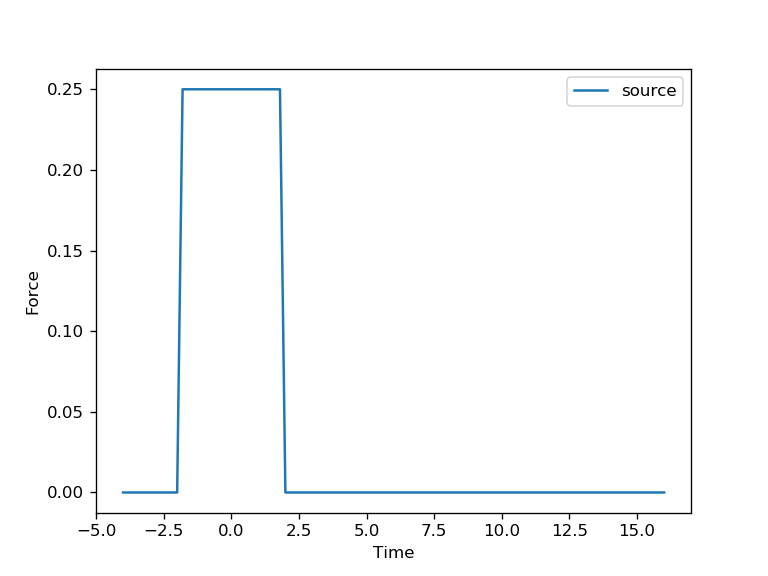

In [47]:
plt.figure()
plt.plot(ts,source,label='source')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Force')
plt.show()

<IPython.core.display.Javascript object>


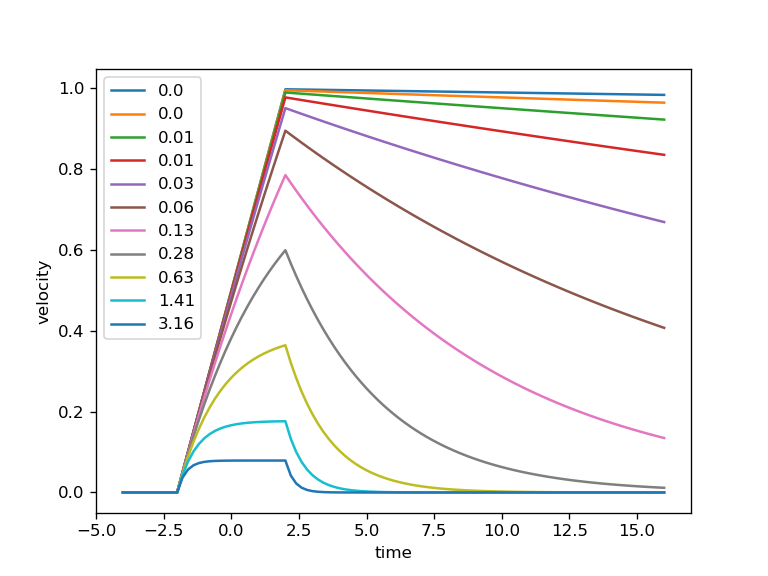

In [48]:
plt.figure()
for beta in betas:
    vt = np.array([])
    
    for t in ts:
        integral = integrate.quad(const,-10,t, args=(t,m,beta,a))
        vt = np.append(vt,integral[0])
    
    plt.plot(ts,vt,label=str(round(beta,2)))
plt.xlabel('time')
plt.ylabel('velocity')
plt.legend()
plt.show()

From an analytic point of view: if the source is an impulse $f(t) = \delta(t)$, the sifting property of the delta function results in 
$$ v(t) = e^{-(\beta/m) t},$$
which is the impulse response, or Green's function, for the motion of a particle in syrup. The Dirac Delta function is introduced in Chapter 13, while the Green's function appears in Chapter 17. In Chapter 18, you will see that this Green's function for a particle in syrup is the same Green's function for the heat equation in the wavenumber domain.

#### Excercise
Make the forcing term shorter and higher amplitude (until the numerical integration breaks) to approximate the Green's function numerically. 


#### Excercise 2
Play with different values of the damping parameter $\beta$, and see if the responses make sense.